# Set up

In [2]:
!pip install pygad
import pygad
!git clone https://github.com/Michalinh0/genetic_algorithm_graph.git
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'genetic_algorithm_graph' already exists and is not an empty directory.


## Set up a graph

In [6]:
with open('genetic_algorithm_graph/graph.txt') as file:
    lines = file.readlines()
#with open('genetic_algorithm_graph/graph2.txt') as file:
#    lines = file.readlines()
#with open('genetic_algorithm_graph/graph3.txt') as file:
#    lines = file.readlines()
lines = [line.strip() for line in lines]
print(lines)

['4', '1 3 1 4 2 3 2 4']


In [7]:
vertices_count = int(lines[0])
print(vertices_count)
print(lines)
edges = list()
edges_count = int(len(lines[1]) / 2)
for i in range(edges_count):
  edges.append((lines[1][2*i] , lines[1][2*i + 1]))
print(edges)

4
['4', '1 3 1 4 2 3 2 4']
[('1', ' '), ('3', ' '), ('1', ' '), ('4', ' '), ('2', ' '), ('3', ' '), ('2', ' ')]


In [128]:
vertices_count = 0
edges = []

with open('genetic_algorithm_graph/graph3.txt') as file:
    vertices_count = int(file.readline().strip())
    line = file.readline().strip().split()
    edges = [(int(line[i]), int(line[i + 1])) for i in range(0, len(line), 2)]

edges_count = len(edges)

print(vertices_count)
print(edges)
print(edges_count)

10
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 1)]
10


# Fitness function

In [10]:
def segment(p1 , p2 , p3):
  if(p2[0] <= max(p1[0] , p3[0])) and (p2[0] >= min(p1[0] , p3[0])) and (p2[1] <= max(p1[1] , p3[1])) and (p2[1] >= min(p1[1] , p3[1])):
    return True
  return False

In [95]:
def orientation(p1 , p2 , p3):
  value = (p2[1] - p1[1] ) * (p3[0] - p2[0]) - (p2[0] - p1[0] * p3[1] - p2[1])
  if value > 0:
    return 1
  if value < 0:
    return 2
  return 0

In [12]:
def cross(edge1 , edge2 , vertices):
  A = vertices[int(edge1[0]) - 1]
  B = vertices[int(edge1[1]) - 1]
  C = vertices[int(edge2[0]) - 1]
  D = vertices[int(edge2[1]) - 1]

  orientation1 = orientation(A,B,C)
  orientation2 = orientation(A,B,D)
  orientation3 = orientation(C,D,A)
  orientation4 = orientation(C,D,B)

  if orientation1 != orientation2 and orientation3 != orientation4:
    return True
  if orientation1 == 0 and segment(A,C,B):
    return True
  if orientation2 == 0 and segment(A,D,B):
    return True
  if orientation3 == 0 and segment(C,A,D):
    return True
  if orientation4 == 0 and segment(C,B,D):
    return True
  return False
  

In [13]:
def fitness(solution, solution_idx):
  vertices = list()

  for i in range(vertices_count):
    vertices.append((solution[2*i] , solution[2*i+1]))

  fitness = 2 * edges_count * (edges_count - 1)

  for edge in edges:
    for edge2 in edges:
      if edge == edge2:
        continue

      if edge[0] == edge2[0] or edge[0] == edge2[1] or edge[1] == edge2[0] or edge[1] == edge2[1]:
        continue

      if cross(edge , edge2 , vertices):
          fitness -= 1
          
  return fitness
      

# Genetic algorithm using Pygad

In [159]:
fitness_function = fitness

num_generations = 150
num_parents_mating = 32

sol_per_pop = 32
num_genes = 2*vertices_count

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_num_genes = 1

In [160]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=mutation_num_genes)

ga_instance.run()

[ 3.14347758  2.40116854  1.79254121  1.96489205  0.38455352 -2.89326793
 -2.66229597 -4.6377913  -0.98229511 -3.52526387 -7.75783315 -1.74379323
  1.74416413  4.17445167] 60


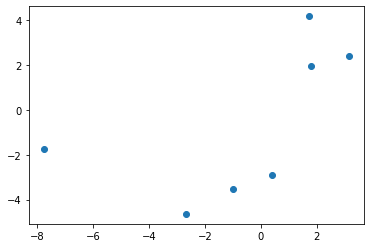

In [73]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
x = list()
y = list()

for i in range(vertices_count):
  x.append(solution[2*i])
  y.append(solution[2*i + 1])
  
print(solution , solution_fitness)
plt.scatter(x, y)

In [139]:
def intersects(s0,s1):
    dx0 = s0[1][0]-s0[0][0]
    dx1 = s1[1][0]-s1[0][0]
    dy0 = s0[1][1]-s0[0][1]
    dy1 = s1[1][1]-s1[0][1]
    p0 = dy1*(s1[1][0]-s0[0][0]) - dx1*(s1[1][1]-s0[0][1])
    p1 = dy1*(s1[1][0]-s0[1][0]) - dx1*(s1[1][1]-s0[1][1])
    p2 = dy0*(s0[1][0]-s1[0][0]) - dx0*(s0[1][1]-s1[0][1])
    p3 = dy0*(s0[1][0]-s1[1][0]) - dx0*(s0[1][1]-s1[1][1])
    return (p0*p1<=0) & (p2*p3<=0)

[-5.52056261 -2.74444422 -5.74750172 -2.64238016 -3.07060384  0.50720241
 -1.55666201 -3.1485639  -1.37777618 -1.96117133 -0.71680267 -5.46433859
  2.80320294 -0.02992274  2.70140789 -0.07741412  0.65434501 -0.23720518
  2.07739839  2.53933064]
(1, 2)  (2, 3)  (3, 4)  (4, 5)  (5, 6)  (6, 7)  (7, 8)  (8, 9)  (9, 10)  (10, 1)  

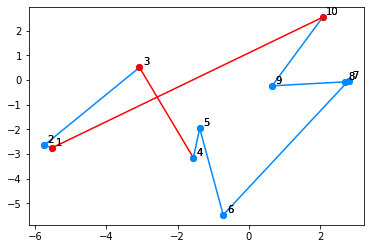

In [161]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)

edge_colors = {}

for edge1 in edges:
    for edge2 in edges:
        if edge1 == edge2 or edge1[0] in edge2 or edge1[1] in edge2:
            continue

        A = (solution[2 * (edge1[0] - 1)], solution[2 * (edge1[0] - 1) + 1])
        B = (solution[2 * (edge1[1] - 1)], solution[2 * (edge1[1] - 1) + 1])

        C = (solution[2 * (edge2[0] - 1)], solution[2 * (edge2[0] - 1) + 1])
        D = (solution[2 * (edge2[1] - 1)], solution[2 * (edge2[1] - 1) + 1])

        if edge1 in edge_colors and edge_colors[edge1] == '#f00':
            continue

        edge_colors[edge1] = '#f00' if intersects((A, B), (C, D)) else '#08f'

for edge in edges:
    print(edge, end='  ')

    x = [solution[2 * (edge[0] - 1)], solution[2 * (edge[1] - 1)]]
    y = [solution[2 * (edge[0] - 1) + 1], solution[2 * (edge[1] - 1) + 1]]

    plt.plot(x, y, '-o', color=edge_colors[edge] or '#08f')

    plt.text(x[0] + 0.1, y[0] + 0.1, edge[0])
    plt.text(x[1] + 0.1, y[1] + 0.1, edge[1])